Text(0, 0.5, 'Amplitude do Sinal')

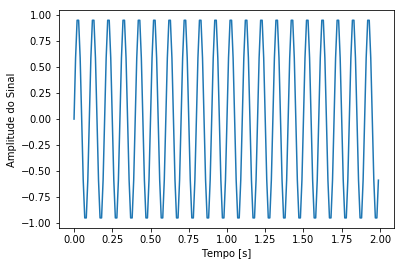

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



f = 10
f_s = 100

t = np.linspace(0, 2, 2 * f_s, endpoint = False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Amplitude do Sinal')

(-5, 110)

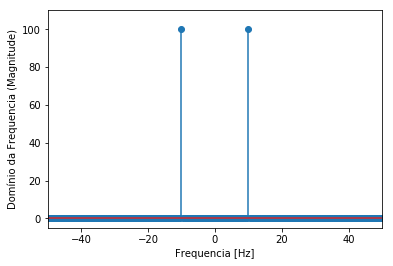

In [6]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequencia [Hz]')
ax.set_ylabel('Domínio da Frequencia (Magnitude)')
ax.set_xlim(-f_s/2, f_s/2)
ax.set_ylim(-5,110)

In [7]:
from IPython.display import Audio
Audio('Nightingale-sound.mp3')

Text(0, 0.5, 'Amplitude')

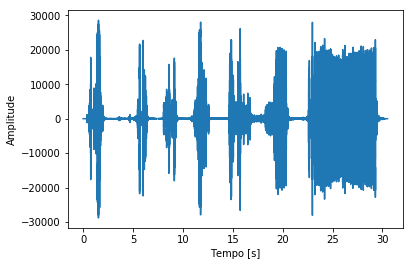

In [12]:
from scipy.io import wavfile
rate, audio = wavfile.read('output.wav')

audio = np.mean(audio, axis=1)

N = audio.shape[0]
L = N / rate
#print('Duração do Áudio : {L:.2f} segundos')

f,ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Amplitude')

In [14]:
from skimage import util

M = 1024

slices = util.view_as_windows(audio, window_shape = (M,), step=100)


In [15]:
win = np.hanning(M+1)[:-1]
slices = slices * win

In [16]:
slices = slices.T

spectrum = np.fft.fft(slices, axis = 0) [:M // 2 + 1: -1]
spectrum = np.abs(spectrum)

/home/telespazio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5, 0, 'Tempo [s]')

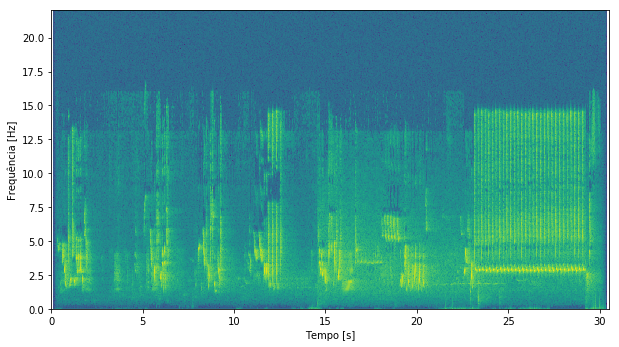

In [23]:
f, ax = plt.subplots(figsize=(10.0, 5.5))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(5))

ax.imshow(S, origin='lower', cmap='viridis', extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequência [Hz]')
ax.set_xlabel('Tempo [s]')


/home/telespazio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0.5, 0, 'Tempo [s]')

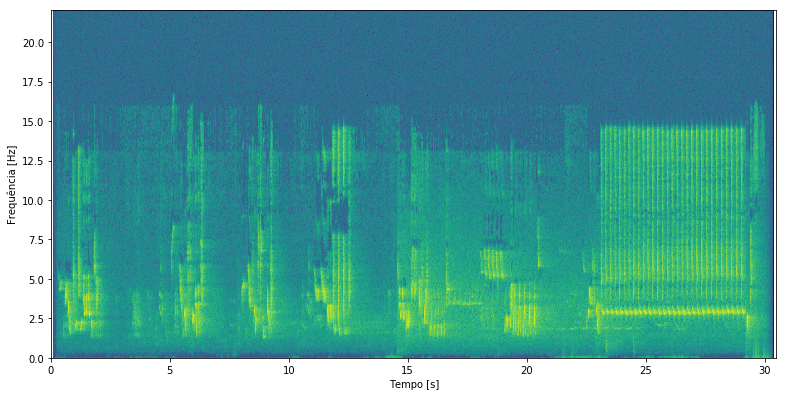

In [24]:
from scipy import signal
freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning', nperseg=1024, noverlap=M - 100, detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(13.0, 6.4))
ax.pcolormesh(times,freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequência [Hz]')
ax.set_xlabel('Tempo [s]')